First 5 rows:
                                 Category  Current year (01.04.22 - 31.03.23)  \
0         Donors after brain death (DBD)                                 773   
1   Donors after circulatory death (DCD)                                 657   
2             Total deceased donors (DD)                                1430   
3    Non-proceeding deceased donors (DD)                                 471   
4  Living donors (LD) - 1 mth in arrears                                 852   

   Previous year (01.04.21 - 31.03.22)  % Change (Previous Year)  \
0                                  785                      -1.5   
1                                  612                       7.4   
2                                 1397                       2.4   
3                                  497                      -5.2   
4                                  856                      -0.5   

   Pre-COVID year (01.04.19 - 31.03.20)  % Change (Pre-COVID Year)  \
0                        

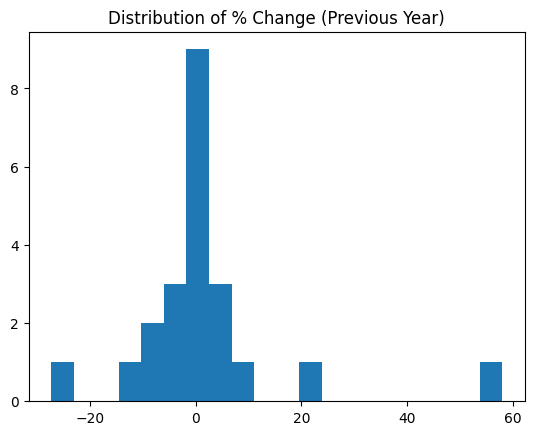


Features (X):
    Category  Current year (01.04.22 - 31.03.23)  \
0         0                                 773   
1         1                                 657   
2        19                                1430   
3        13                                 471   
4        10                                 852   

   Previous year (01.04.21 - 31.03.22)  Pre-COVID year (01.04.19 - 31.03.20)  \
0                                  785                                   946   
1                                  612                                   634   
2                                 1397                                  1580   
3                                  497                                   723   
4                                  856                                  1016   

   % Change (Pre-COVID Year)  Total DD transplants  Total LD transplants  \
0                      -18.3                     0                     0   
1                        3.6                

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/NHS_Organ_Donation.csv')

# Display the first few rows
print("First 5 rows:\n", df.head())

# Get information about the dataframe
print("\nDataFrame info:\n", df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Get the unique values for Categorical Columns
categorical_features = ['Category']
for column in categorical_features:
    print(f"\nUnique values for {column}: \n {df[column].unique()}")

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Histogram of the target variable
plt.hist(df['% Change (Previous Year)'], bins=20)
plt.title("Distribution of % Change (Previous Year)")
plt.show()

# Label Encode categorical features
categorical_features = ['Category']
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Ensure required columns exist before computations
required_columns = ['% Change (Previous Year)', '% Change (Pre-COVID Year)', 'Total DD transplants', 'Total LD transplants']
for col in required_columns:
    if col not in df.columns:
        df[col] = 0  # Assigning a default value

# Data Features
df['Change Diff Pre-COVID Year'] = df['% Change (Previous Year)'] - df['% Change (Pre-COVID Year)']
df['change_ratio_DD'] = df['% Change (Previous Year)'] / df['Total DD transplants'].replace(0, np.nan)
df['change_ratio_LD'] = df['% Change (Previous Year)'] / df['Total LD transplants'].replace(0, np.nan)

# Handling inf and NaN
inf_columns = ['change_ratio_DD', 'change_ratio_LD']
df[inf_columns] = df[inf_columns].replace([np.inf, -np.inf], np.nan)
df[inf_columns] = df[inf_columns].fillna(0)

# Features and target columns
X = df.drop(columns=['% Change (Previous Year)', 'Previous full financial year (2021/2022)'], errors='ignore')
y = df['% Change (Previous Year)']
print("\nFeatures (X):\n", X.head())
print("\nTarget variable (y):\n", y.head())
